In [ ]:
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
!python -m spacy download en_core_web_sm
import seaborn as sns
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings. filterwarnings('ignore',category=DeprecationWarning)

In [ ]:
data = open('/content/drive/MyDrive/Benkyou/Text Evaluation/Dataset.txt').read()
data

'A pointer is a variable whose value is the address of another variable, direct address of the memory location. '

In [ ]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
#print(nlp(unnormalised_dataset))
displacy.render(nlp(data), jupyter=True, options={'distance': 90},style='dep')
plt.show()

In [ ]:
def create_cloud(data):
  cloud  = WordCloud(background_color ='white',max_words= 100,stopwords=set(STOPWORDS))
  cloud.generate(data)
  plt.imshow(cloud)
  plt.show()

In [ ]:
def normalize_text(text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    #text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    
    return text

In [ ]:
def Lemmatizer(text):
  lemmatizer = WordNetLemmatizer()
  tokens=[lemmatizer.lemmatize(word) for word in text]
  return tokens

In [ ]:
def Stemming(text):
  ps = PorterStemmer()
  tokens=[ps.stem(word) for word in text]
  print(tokens)

In [ ]:
normalized_data = normalize_text(data)

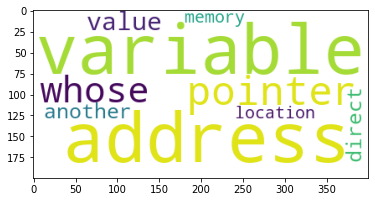

In [ ]:
dataset = normalized_data.lower()
create_cloud(dataset)

In [ ]:
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(dataset)
text_without_stopwords = [x for x in text_tokens if x not in stopwords]
text_without_stopwords

['pointer',
 'variable',
 'whose',
 'value',
 'address',
 'another',
 'variable',
 'direct',
 'address',
 'memory',
 'location']

In [ ]:
model = Word2Vec([text_without_stopwords],min_count=1)
vocabulary=model.wv.vocab

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import math

In [ ]:
import numpy as np
def run_wmd_benchmark(tokens1, tokens2, model,doc_freqs=None):
  if doc_freqs is not None:
        N = 1288431
  sims=[]
  if len(tokens1) == 0 or len(tokens2) == 0:
    sims.append(0)
    #continue
  tokfreqs1 = Counter(tokens1)
  tokfreqs2 = Counter(tokens2)
        
  weights1 = [tokfreqs1[token] * math.log(N/(doc_freqs.get(token, 0)+1)) for token in tokfreqs1] if doc_freqs else None
  weights2 = [tokfreqs2[token] * math.log(N/(doc_freqs.get(token, 0)+1)) for token in tokfreqs2] if doc_freqs else None
                
  embedding1 = np.average([model[token] for token in tokfreqs1], axis=0, weights=weights1).reshape(1, -1)
  embedding2 = np.average([model[token] for token in tokfreqs2], axis=0, weights=weights2).reshape(1, -1)

  sim = cosine_similarity(embedding1, embedding2)[0][0]
  sims.append(sim)

  return sims

In [ ]:
sen1 ='pointer is address of a variable direct memory location'.split(' ')
sen2 = 'pointer is a variable that store address of same datatype'.split(' ')
#for (i,j) in zip(sen1,sen2):
sen1,sen2 = [x for x in sen1 if x not in stopwords],[j for j in sen1 if j not in stopwords]

In [ ]:
print('similarity =',run_wmd_benchmark(sen1,sen2, model,doc_freqs=None))

similarity = [1.0]
